In [1]:
# import os
# os.getcwd()
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../lib/")

In [3]:
name="./../img/Lena"
ext=".jpg"
img=name+ext
print img

./../img/Lena.jpg


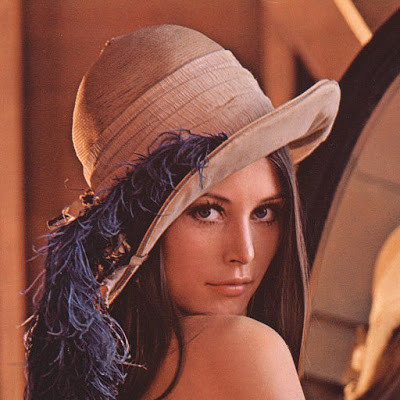

In [4]:
from IPython.display import Image
Image(filename=img) 

In [5]:
from PIL import Image
from numpy import array
im = array(Image.open(img))
im = im[:, :, 0]

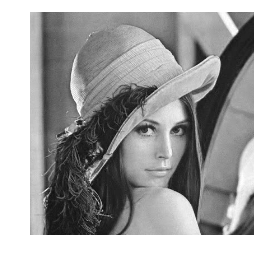

In [23]:
from matplotlib.pyplot import imshow, show, subplot, savefig, figure, gray, title, gray, axis
imshow(im)
gray()
axis('off')
savefig(name+"_gray"+ext)
show()

In [15]:
print im.shape

from filters import gaussian_filter
g_filter = gaussian_filter(im, s=2, sigma=2.0)

from filters import gradient_filter
gradient_img, tan_img  = gradient_filter(g_filter)

(400, 400)


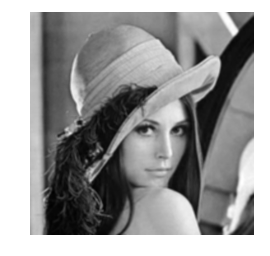

In [16]:
axis('off')
imshow(g_filter)
savefig(name+"_blur"+ext)
show()

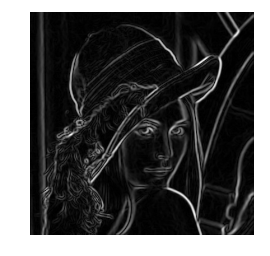

In [17]:
axis('off')
imshow(gradient_img)
savefig(name+"_grad_magnitude"+ext)
show()

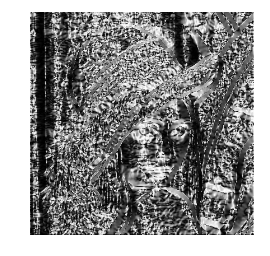

In [18]:
axis('off')
imshow(tan_img)
savefig(name+"_grad_orientation"+ext)
show()

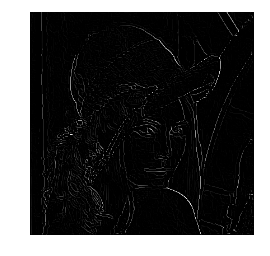

In [19]:
from filters import nonmax_suppression
from __future__ import division
import numpy as np
loc_max = nonmax_suppression(gradient_img, tan_img)
axis('off')
imshow(loc_max)
savefig(name+"_non_nam_suppression"+ext)
show()

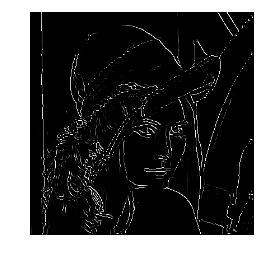

In [20]:
from filters import thresholding
thresholding = thresholding(loc_max, lo_val = 0.1 , hi_val=0.3)
axis('off')
imshow(thresholding)
savefig(name+"_thresholding"+ext)
show()

 start
3281 4444 4681 4794 4856 4866 4879 4883 4883.0


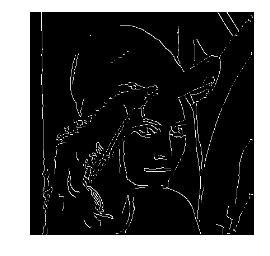

In [22]:
from numpy import array as nparray
from numpy import where, concatenate, zeros
from numpy import sum as npsum
from numpy import max as npmax
edge    = zeros(thresholding.shape)
max_val =  npmax(thresholding)

t_max = npmax(thresholding)
edge[thresholding==t_max]=1.0

print "start"

def track_max(edge, thresh, x, depth, directions):
    if depth < 1:
        return
    for a in directions:
        d = np.rint([np.cos(a), np.sin(a)]).astype(int)
        i,j = x+d
        if 0 <= i < thresh.shape[0]  and 0 <= j < thresh.shape[0]:
            if  0.1 < thresh[i,j] < 1:
                edge[i,j] = 1.0
                track_max(edge, thresh, array([i,j]), depth - 1, [a, a + np.pi/4, a - np.pi/4])

old_ones_len = 0
directions   = np.array(range(4))*np.pi/2
while True:
    ones = [(i,j) for i,j in concatenate(where(edge == 1.0)).reshape(2,-1).T]
    print len(edge[edge>0]),
    for p in ones:
        i, j = p
        edge[i,j] += 1.0
#         directions = [nparray([i,j]) for i in xrange(-1,2) for j in xrange(-1,2) if (i,j)!=(0,0)]
    for p in ones:
        i, j = p
        track_max(edge, thresholding, nparray([i,j]), 10, directions)
    if old_ones_len == len(edge[edge>0]):
        break
    else:
        old_ones_len = len(edge[edge>0])

edge[edge>0] = 1.0
print npsum(edge)
axis('off')
savefig(name+"_edge"+ext)
imshow(edge)
show()